下载网页图片作为数据源，使用谷歌图片搜索teddy bear，然后调出console，opt+com+j
```sh
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
folder = 'black'
file = 'url_black.txt'

In [7]:
folder = 'teddys'
file = 'url_teddys.txt'

In [5]:
folder = 'grizzly'
file = 'url_grizzly.txt'

In [6]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [7]:
classes = ['teddys', 'black', 'grizzly']
download_images(path/file, dest, max_pics=200)


 Download of https://cbsnews1.cbsistatic.com/hub/i/2018/04/28/c6cb470f-edb2-4329-a6ad-af3ad788c2d6/istock-695736858.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p /Users/liyihao/.fastai/data
$ cd /Users/liyihao/.fastai/data
$ wget -c https://cbsnews1.cbsistatic.com/hub/i/2018/04/28/c6cb470f-edb2-4329-a6ad-af3ad788c2d6/istock-695736858.jpg
$ tar -zxvf istock-695736858.jpg

And re-run your code once the download is successful

Error https://www.terracestandard.com/wp-content/uploads/2019/09/18625085_web1_bears-stewart1.jpg HTTPSConnectionPool(host='www.terracestandard.com', port=443): Max retries exceeded with url: /wp-content/uploads/2019/09/18625085_web1_bears-stewart1.jpg (Caused by ProxyError('Cannot connect to proxy.', timeout('select timed out')))

 Download of https://resize.hswstatic.com/w_907/gif/grizzly-center.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p /Users/liyihao/.fastai/data
$ cd /Users/liyihao/.fastai/data
$ wget -c https

SystemExit: 1

In [10]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

In [25]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=224, 
                                  num_workers=4).normalize(imagenet_stats)

In [26]:
data.classes

['black', 'grizzly', 'teddys']

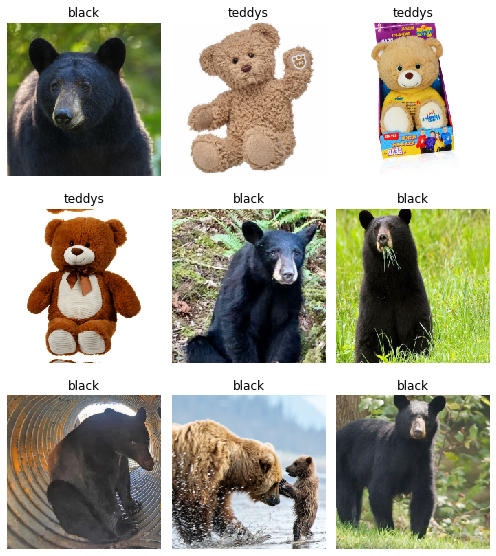

In [27]:
data.show_batch(rows=3, figsize=(7, 8))

In [15]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 195, 48)

In [28]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [29]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.597636,0.159662,0.062500,01:20
1,0.887029,0.050982,0.041667,01:07
2,0.617454,0.046809,0.041667,01:27
3,0.489617,0.042011,0.020833,01:10


In [30]:
learn.save("stage-1")

In [31]:
learn.unfreeze()

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [24]:
doc(learn.unfreeze)

unfreeze [source] [test] unfreeze () 
 
 × Tests found for unfreeze : pytest -sv tests/test_basic_train.py::test_unfreeze [source] To run tests please refer to this guide . Unfreeze entire model. 
 Show in docs

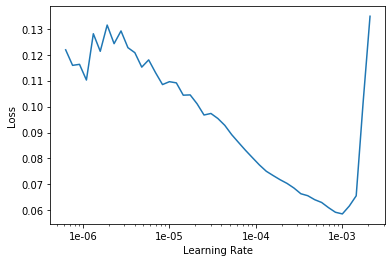

In [33]:
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(2, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.019981,0.350018,0.062500,01:53
1,0.033268,0.213874,0.020833,01:54


In [38]:
learn.save("stage-2")

In [39]:
learn.load("stage-2")

Learner(data=ImageDataBunch;

Train: LabelList (195 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddys,teddys,teddys,teddys,teddys
Path: data/bears;

Valid: LabelList (48 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddys,teddys,grizzly,black,black
Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac

In [40]:
interp = ClassificationInterpretation.from_learner(learn)

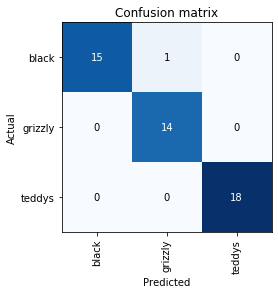

In [41]:
interp.plot_confusion_matrix()

In [53]:
from fastai.widgets import *

In [55]:
losses, idxs = interp.top_losses()
print(losses)
print(idxs)

tensor([1.0147e+01, 1.1802e-01, 3.2050e-04, 2.7331e-04, 2.4185e-04, 1.0704e-04,
        2.3484e-05, 2.0623e-05, 1.3113e-05, 9.8943e-06, 9.0599e-06, 8.7022e-06,
        8.3446e-06, 6.7949e-06, 6.1989e-06, 5.6028e-06, 3.0994e-06, 2.8610e-06,
        1.9073e-06, 1.5497e-06, 1.4305e-06, 1.4305e-06, 1.3113e-06, 9.5367e-07,
        8.3446e-07, 7.1526e-07, 7.1526e-07, 5.9605e-07, 5.9605e-07, 2.3842e-07,
        1.1921e-07, 1.1921e-07, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
        -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
        -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00])
tensor([11, 24,  4,  3, 41,  7, 42, 14, 12, 39, 31, 36, 25,  5, 44, 30, 15, 10,
         9, 28,  8,  6, 22, 46, 17, 38, 19, 13, 29, 27, 23, 21, 32, 33, 34, 35,
        26, 37,  0, 20, 40, 18, 16, 43,  2, 45,  1, 47])


In [56]:
top_loss_paths = data.valid_ds.x[idxs]
print(top_loss_paths)

ImageList (48 items)
Image (3, 254, 400),Image (3, 555, 1075),Image (3, 1200, 1200),Image (3, 558, 992),Image (3, 253, 450)
Path: data/bears


In [57]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Train)
# ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Train)
# ImageRelabeler(ds, idxs)
# or
# ImageDeleter(ds, idxs)

In [58]:
print(ds)
print(idxs)

LabelList (195 items)
x: ImageList
Image (3, 250, 300),Image (3, 250, 300),Image (3, 250, 300),Image (3, 250, 300),Image (3, 250, 300)
y: CategoryList
teddys,teddys,teddys,teddys,teddys
Path: data/bears
tensor([141,  87, 160,  99, 179, 176, 190,  93, 104, 177, 151, 188, 123,  97,
        171,  44, 111, 134,  67,  92,  30, 164, 154, 162, 148,  19, 114,  83,
         66, 106, 144, 107, 121, 163, 109, 101, 102, 112, 119, 137,  80, 113,
        193, 135, 110,  84, 122, 168,  69, 105, 149, 194,  81, 142, 158,  89,
         90,  95,  13,  82, 139,  39,  68, 116, 118, 103, 150,  78, 131,  91,
         94, 136, 170,  34, 115,  71,   9, 192,   7,  48,  51,  74,  63,  40,
        174,  26, 127, 100,   1, 161,  65, 108,  98, 117, 124,  10, 186, 126,
        167,  61,  79, 173,  88,  86,   4,  70, 181,  72,  18,  11,  32,  31,
         29,  28,  27,  33,  35,  36,  37,  38, 120,  25,  24,  23,  96, 125,
         41,  42, 128, 129, 130,  43, 132, 133,  22,  21,  85,  20, 138,  45,
        140,  46,

In [65]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [63]:
doc(ImageCleaner)

class ImageCleaner [source] [test] ImageCleaner ( dataset , fns_idxs , path , batch_size : int = 5 , duplicates = False ) 
 
 × Tests found for ImageCleaner : pytest -sv tests/test_widgets_image_cleaner.py::test_image_cleaner_index_length_mismatch [source] pytest -sv tests/test_widgets_image_cleaner.py::test_image_cleaner_length_correct [source] pytest -sv tests/test_widgets_image_cleaner.py::test_image_cleaner_wrong_input_type [source] To run tests please refer to this guide . Displays images for relabeling or deletion and saves changes in path as 'cleaned.csv'. 
 Show in docs

In [78]:
recall_i = torch.tensor([0., 2., 4., 5., 6., 6., 7., 8.])
recall = torch.cat((torch.tensor([0.]), recall_i, torch.tensor([1.])))

In [82]:
print(recall)
print(recall[1:])
print(recall[:-1])
p = (recall[1:] != recall[:-1]).nonzero()
print(p)

tensor([0., 0., 2., 4., 5., 6., 6., 7., 8., 1.])
tensor([0., 2., 4., 5., 6., 6., 7., 8., 1.])
tensor([0., 0., 2., 4., 5., 6., 6., 7., 8.])
tensor([[1],
        [2],
        [3],
        [4],
        [6],
        [7],
        [8]])


In [85]:
recall[p]

tensor([[0.],
        [2.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.]])

In [86]:
recall[p+1] 

tensor([[2.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [1.]])

In [87]:
recall[p+1] - recall[p]

tensor([[ 2.],
        [ 2.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [-7.]])